In [1]:
#chapter 11
#1)use the gram-schmidt algorithm
import numpy as np
def gram_schmidt(a):
    q=[]
    for i in range(len(a)):
        #orthogonalization
        q_tilde=a[i]
        for j in range(len(q)):
            q_tilde = q_tilde - (q[j]@a[i])*q[j]
        q_tilde = q_tilde / np.sqrt(sum(q_tilde**2))
        q.append(q_tilde) #此处q[i]代表Q的第i行
    return q

#2)QR factorization
def QR_factorization(A):
    Q_transpose = np.array(gram_schmidt(A.T))
    R = Q_transpose @ A
    Q = Q_transpose.T
    return Q,R
#or we can use the function: Q,R = np linalg.qr(A)

#3)Dual basis : A is invertible with inverse B, then x = ABx
A = np.array([[1,0,1], [4,-3,-4], [1,-1,-2]])
B=np.linalg.inv(A)
x = np.array([0.2,-0.3,1.2])
x_1 = (B[0,:]@x)*A[:,0] + (B[1,:]@x)*A[:,1] + (B[2,:]@x)*A[:,2]
print(x_1)

#4)inverse via QR factorization: A = QR, so inv(A) = inv(R)Q.T 
A = np.random.normal(size = (3,3))
print(np.linalg.inv(A))
Q,R = QR_factorization(A)
print(np.linalg.inv(R)@Q.T)

#5)back substitution
def back_subst(R,b_tilde): #there R is a upper matrix
    n = R.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = b_tilde[i]
        for j in range(i+1,n):
            x[i] = x[i] - R[i,j]*x[j]
        x[i] = x[i]/R[i,i]
    return x

#6)solving system of linear equations, here x is the pseudo-matrix.
def solve_via_backsub(A,b):
    Q,R = QR_factorization(A)
    b_tilde = Q.T @ b
    x= back_subst(R,b_tilde)
    return x
#also we can use the function: np.linalg.solve(A,b) ,which is faster than np.linalg.inv(A)@ b in some cases.

#7)Pseudo-inverse
A = np.array([[-3,-4],[4,6],[1,1]])
print(np.linalg.pinv(A))
Q,R = np.linalg.qr(A)
print(np.linalg.solve(R,Q.T))

[ 0.2 -0.3  1.2]
[[-0.19865916  0.65880895  1.03458368]
 [ 0.00511315 -1.78891519 -1.61559082]
 [ 0.70292712  1.25299338  1.74038   ]]
[[-0.19865916  0.65880895  1.03458368]
 [ 0.00511315 -1.78891519 -1.61559082]
 [ 0.70292712  1.25299338  1.74038   ]]
[[-1.22222222 -1.11111111  1.77777778]
 [ 0.77777778  0.88888889 -1.22222222]]
[[-1.22222222 -1.11111111  1.77777778]
 [ 0.77777778  0.88888889 -1.22222222]]


[ 4.4408921e-16 -4.4408921e-16]
-8.881784197001252e-16
2.7519522307085963e-16
7.187702745536129e-16
7.508575982388742e-16
6.273595333099365
[  62.07662454   99.98500403 1442.83746254]
17.592889516314152
0.14039048134276055


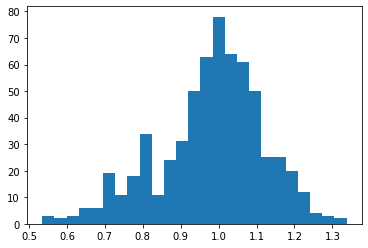

0.24174131853807873


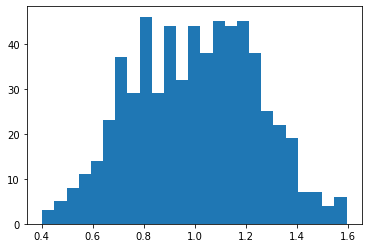

In [2]:
#chapter 12 : least square problem
import numpy as np
A = np.array([[2,0],[-1,1],[0,2]])
b = np.array([1,0,-1])
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b # np.linalg.pinv(A) @ b
print((A.T @ A) @ x_hat - A.T @ b)

# orthogonality principle
r = A @ x_hat - b
z = np.array([-1.1,2.3])
print((A @ z).T @ r)

# solving least squares problem
A = np.random.normal(size = (100,20))
b = np.random.normal(size = 100)
x1 = solve_via_backsub(A,b)
x2 = np.linalg.inv(A.T @ A) @ A.T @ b
x3 = np.linalg.pinv(A) @ b
print(np.linalg.norm(x1-x2))
print(np.linalg.norm(x2-x3))
print(np.linalg.norm(x3-x1))

#complexity: 2mn^2 flops
import time
m = 2000
n = 1000
A = np.random.normal(size = (m,n))
b = np.random.normal(size = m)
start = time.time()
x = solve_via_backsub(A,b)
end = time.time()
print(end - start)

#example:
#1)adertising purchases
n = 3
m = 10
R = np.array([[0.97,1.86,0.41], [1.23,2.18,0.53],
    [0.80,1.24,0.62], [1.29,0.98,0.51], [1.10,1.23,0.69],
    [0.67,0.34,0.54], [0.87,0.26,0.62], [1.10,0.16,0.48],
    [1.92,0.22,0.71], [1.29,0.12,0.62]])
v_des = 1e+3*np.ones(10)
s = solve_via_backsub(R,v_des)
print(s)
print(np.sqrt(sum(R @ s - v_des)**2)/len(v_des))

#2)illumination (difficult!!!)
import numpy as np
#number of lamps
n = 10
# x, y positions of lamps and height above floor
lamps = np.array([[4.1 ,20.4, 4],[14.1, 21.3, 3.5],[22.6, 17.1,
    6], [5.5 ,12.3, 4.0], [12.2, 9.7, 4.0], [15.3, 13.8, 6],
    [21.3, 10.5, 5.5], [3.9 ,3.3, 5.0], [13.1, 4.3, 5.0], [20.3,
    4.2, 4.5]])
N = 25 # grid size
m = N*N # number of pixels
# construct m*2 matrix with coordinates of pixel centers
pixels = np.hstack([np.outer(np.arange(0.5,N,1),np.ones(N)).reshape(m,1),
                    np.outer(np.ones(N),np.arange(0.5,N,1)).reshape(m,1)]) # 注意np.outer的用法
# The m*n matrix A maps lamp powers to pixel intensities.
# A[i,j] is inversely proportional to the squared distance of lamp j to pixel i.
A = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        A[i,j] = 1.0 / (np.linalg.norm(np.hstack([pixels[i,:],0]) - lamps[j,:])**2)
        
A = (m/np.sum(A)) * A #scale elements of A
#Least squares solution 
x = solve_via_backsub(A , np.ones(m))
rms_ls = (sum((A @ x - 1)**2)/m)**0.5
print(rms_ls)

import matplotlib.pyplot as plt
plt.ion()
plt.hist(A @ x, bins = 25)
plt.show()

#intensity if all lamp powers are one
rms_uniform = (sum((A @ np.ones(n) - 1)**2)/m)**0.5
print(rms_uniform)
plt.hist(A @ np.ones(n), bins = 25)
plt.show()

In [3]:
# chapter 13 : least squares data fitting
# 13.1 least squares data fitting
#1）straight-line fit
import matplotlib.pyplot as plt
plt.ion()
consumption = petroleum_consumption_data()
n = len(consumption)
A = np.column_stack((np.ones(n),np.arange(n))) #np.arange(n)创建步长为1，小于n的等差序列
x = solve_via_backsub(A, consumption)
plt.scatter(np.arange(1980,2014),consumption)
plt.plot(np.arange(1980,2014), A@x, 'r')
#plt.show()

#2）estimation of trend and seasonal component
import matplotlib.pyplot as plt
plt.ion()
vmt = vahicle_miles_data()
m = 15*12
A = np.column_stack((np.arange(m),np.vstack([np.idendity(12) 
                                             for i in range(15)])))
b = np.reshape(vmt.T,m,1)
x = solve_via_backsub(A,b)
plt.scatter(np.arange(m),b)
plt.plot(np.arange(m),A@x,'r')
#plt.show()

#5) house price regression
D = house_sales_data()
area = D["area"]
beds = D["beds"]
price = D["price"]
m = len(price)
A = np.column_stack((np.ones(m),area,beds))
x = solve_via_backsub(A,price)
rms_error = (sum((price - A@x)**2)/m)**0.5
std_price = np.std(price)
print(rms_error)
print(std_price)


NameError: name 'petroleum_consumption_data' is not defined

In [ ]:
#3）polynomial fit
import matplotlib.pyplot as plt
plt.ion()

# vandermonde matrix
def vandermonde(t,n):
    m = len(t)
    V = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            V[i,j] = t[i]**(j)
    return V

# generate training data in the interval [-1,1]
m = 100
t = -1 + 2*np.random.random(m) #区间在-1到1
y = np.power(t,3) - t + 0.4/(1 + 25*np.power(t,2)) + 0.1*np.random.normal(size = m)
plt.scatter(t,y)
plt.show()

polyfit = lambda t,y,p: solve_via_backsub(vandermonde(t,p),y)
theta2 = polyfit(t,y,3)
theta6 = polyfit(t,y,7)
theta10 = polyfit(t,y,11)
theta15 = polyfit(t,y,16)

polyeval = lambda theta,x:vandermonde(x,len(theta)) @ theta #此处x的维数不同
t_plot = np.linspace(-1,1,num = 100)
fig = plt.figure()
plt.ylim(-0.7,0.7)  #y轴坐标上下限

plt.subplot(2,2,1)  #生成两行两列的图表，这是第一个
plt.scatter(t,y)
plt.plot(t_plot, polyeval(theta2, t_plot),'r')

plt.subplot(2, 2, 2)
plt.scatter(t,y)
plt.plot(t_plot, polyeval(theta6, t_plot),'r')

plt.subplot(2, 2, 3)
plt.scatter(t,y)
plt.plot(t_plot, polyeval(theta10, t_plot),'r')

plt.subplot(2, 2, 4)
plt.scatter(t,y)
plt.plot(t_plot, polyeval(theta15, t_plot),'r')
plt.show()

In [ ]:
#4) piecewise-linear fit
import matplotlib.pyplot as plt
plt.ion()
#generate random data
m = 100
x = -2 + 4*np.random.random(m)
y = 1 + 2*(x-1) - 3*np.maximum(x+1,0) + 4*np.maximum(x-1,0) + 0.3*np.random.normal(size = m)
#least sqaure fitting
theta = solve_via_backsub(np.column_stack((np.ones(m),x,np.maximum(x+1,0),np.maximum(x-1,0))),y)
#plot result
t = np.linspace(-2.1,2.1,num = 100)  # or t = np.array([-2.1, -1, 1, 2.1])
yhat = theta[0] + theta[1]*t + theta[2]*np.maximum(t+1,0) + theta[3]*np.maximum(t-1,0)
plt.scatter(x,y)
plt.plot(t,yhat,'r')
plt.show()

3.0505592856293298
1.1602431638206123
1.733894140046875
1.0129632612687511


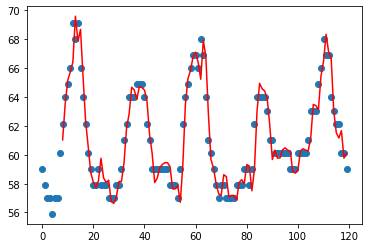

In [18]:
def temperature_data(): 
    """
    temperature_date()
    Returns a vector of length 774 = 31*24 with the hourly temperature at LAX 
    in May 2016 (discussed on pages 259 and 266).
    """
    # Hourly temperature at LAX in May 2016 in a vector of length 31*24 = 744.  Measurements are hourly at 12:53 AM to 11:53PM.
    import numpy as np
    t = np.array([
    59.0, 57.9, 57.0, 57.0, 55.9, 57.0, 57.0, 60.1, 62.1, 64.0, 64.9, 66.0, 69.1, 68.0, 69.1, 66.0, 64.0, 62.1, 60.1, 59.0, 57.9, 57.9, 59.0, 57.9,  # May 1
    57.9, 57.9, 57.0, 57.0, 57.0, 57.9, 57.9, 59.0, 61.0, 62.1, 64.0, 64.0, 64.0, 64.9, 64.9, 64.9, 64.0, 62.1, 61.0, 59.0, 59.0, 59.0, 59.0, 59.0,  
    59.0, 59.0, 57.9, 57.9, 57.9, 57.0, 59.0, 62.1, 64.0, 64.9, 66.0, 66.9, 66.9, 66.0, 68.0, 66.9, 64.0, 61.0, 60.1, 59.0, 57.9, 57.0, 57.9, 57.9,
    57.0, 57.0, 57.0, 57.0, 57.9, 57.9, 57.9, 59.0, 59.0, 57.9, 59.0, 62.1, 64.0, 64.0, 64.0, 64.0, 63.0, 61.0, 61.0, 60.1, 60.1, 60.1, 60.1, 60.1,
    60.1, 59.0, 59.0, 59.0, 60.1, 60.1, 60.1, 60.1, 61.0, 63.0, 63.0, 63.0, 64.9, 66.0, 68.0, 66.9, 66.9, 64.0, 63.0, 62.1, 62.1, 60.1, 60.1, 59.0,
    57.9, 57.9, 59.0, 59.0, 57.9, 57.9, 59.0, 60.1, 60.1, 61.0, 63.0, 64.9, 64.9, 66.0, 66.9, 66.9, 64.9, 64.0, 62.1, 60.1, 60.1, 60.1, 60.1, 59.0,
    59.0, 60.1, 59.0, 59.0, 59.0, 59.0, 57.0, 57.9, 59.0, 60.1, 59.0, 64.0, 66.0, 66.0, 66.0, 64.9, 64.9, 64.0, 62.1, 61.0, 61.0, 60.1, 60.1, 60.1,
    60.1, 59.0, 59.0, 57.9, 57.9, 57.9, 57.9, 59.0, 61.0, 63.0, 64.0, 64.9, 66.0, 66.0, 64.9, 64.9, 64.0, 63.0, 62.1, 61.0, 61.0, 60.1, 60.1, 60.1,
    59.0, 60.1, 59.0, 59.0, 57.9, 57.9, 59.0, 60.1, 61.0, 61.0, 62.1, 63.0, 64.0, 64.9, 64.0, 64.9, 64.0, 63.0, 61.0, 60.1, 59.0, 59.0, 59.0, 59.0,
    59.0, 59.0, 57.9, 57.9, 59.0, 59.0, 60.1, 60.1, 61.0, 62.1, 63.0, 64.0, 64.9, 66.9, 66.9, 66.9, 64.9, 63.0, 62.1, 61.0, 60.1, 60.1, 60.1, 60.1,
    60.1, 60.1, 59.0, 60.1, 59.0, 60.1, 60.1, 61.0, 61.0, 62.1, 63.0, 64.9, 66.9, 66.9, 66.0, 64.9, 63.0, 62.1, 61.0, 61.0, 60.1, 59.0, 59.0, 57.9,
    57.9, 57.9, 57.0, 57.9, 57.9, 57.9, 57.9, 59.0, 61.0, 64.0, 64.0, 64.0, 64.9, 64.9, 64.9, 64.0, 62.1, 61.0, 61.0, 60.1, 60.1, 60.1, 60.1, 60.1,
    59.0, 59.0, 60.1, 60.1, 60.1, 60.1, 60.1, 61.0, 62.1, 62.1, 63.0, 64.0, 69.1, 68.0, 68.0, 66.0, 64.9, 63.0, 63.0, 62.1, 62.1, 62.1, 62.1, 61.0,
    63.0, 62.1, 61.0, 61.0, 61.0, 61.0, 61.0, 62.1, 62.1, 64.9, 64.9, 64.9, 66.9, 66.9, 66.0, 66.0, 64.9, 64.0, 62.1, 61.0, 61.0, 61.0, 61.0, 62.1,
    63.0, 62.1, 62.1, 62.1, 62.1, 62.1, 62.1, 62.1, 63.0, 64.0, 66.0, 68.0, 70.0, 69.1, 68.0, 66.9, 66.9, 64.9, 64.0, 62.1, 61.0, 61.0, 61.0, 61.0,
    61.0, 62.1, 62.1, 62.1, 61.0, 62.1, 62.1, 63.0, 63.0, 63.0, 64.9, 66.9, 68.0, 68.0, 68.0, 68.0, 66.9, 64.9, 64.0, 62.1, 63.0, 62.1, 62.1, 62.1,
    62.1, 61.0, 61.0, 61.0, 61.0, 61.0, 62.1, 62.1, 64.0, 64.0, 66.0, 66.9, 66.9, 68.0, 68.0, 66.9, 66.0, 64.9, 63.0, 62.1, 62.1, 62.1, 61.0, 61.0,
    62.1, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 62.1, 62.1, 63.0, 63.0, 62.1, 63.0, 62.1, 62.1, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0,
    61.0, 62.1, 61.0, 61.0, 61.0, 61.0, 61.0, 62.1, 62.1, 63.0, 64.0, 64.9, 64.9, 66.9, 66.9, 66.9, 64.9, 63.0, 62.1, 61.0, 61.0, 61.0, 61.0, 60.1,
    60.1, 60.1, 60.1, 59.0, 57.9, 59.0, 59.0, 61.0, 62.1, 66.0, 64.0, 64.0, 64.0, 64.9, 64.9, 62.1, 63.0, 61.0, 61.0, 59.0, 59.0, 57.9, 57.9, 57.9,
    57.0, 57.0, 55.9, 57.0, 57.0, 55.9, 57.0, 60.1, 62.1, 62.1, 64.0, 64.0, 64.9, 64.0, 64.0, 63.0, 63.0, 62.1, 61.0, 60.1, 60.1, 60.1, 59.0, 59.0,
    57.9, 57.9, 57.0, 54.0, 55.0, 54.0, 57.0, 59.0, 61.0, 64.9, 66.0, 66.9, 66.9, 66.0, 66.0, 66.0, 64.9, 64.0, 64.0, 61.0, 61.0, 60.1, 60.1, 59.0,
    57.9, 57.0, 57.9, 57.0, 55.9, 57.0, 57.9, 61.0, 63.0, 64.0, 66.9, 69.1, 70.0, 70.0, 70.0, 66.0, 66.0, 63.0, 62.1, 60.1, 59.0, 59.0, 57.9, 57.9,
    57.9, 57.9, 57.9, 57.9, 57.9, 57.9, 59.0, 62.1, 62.1, 63.0, 64.0, 66.0, 66.0, 64.9, 64.9, 64.9, 64.9, 63.0, 61.0, 61.0, 60.1, 60.1, 60.1, 59.0,
    57.9, 57.9, 57.9, 57.0, 57.0, 57.0, 57.9, 60.1, 61.0, 62.1, 63.0, 64.0, 64.0, 64.0, 64.0, 66.0, 64.9, 64.0, 62.1, 60.1, 60.1, 59.0, 57.9, 57.9,
    57.9, 57.9, 57.9, 55.9, 55.9, 57.0, 59.0, 61.0, 63.0, 64.0, 66.0, 66.0, 68.0, 68.0, 66.9, 64.9, 64.0, 63.0, 63.0, 61.0, 60.1, 60.1, 60.1, 60.1,
    59.0, 59.0, 59.0, 59.0, 57.9, 57.9, 60.1, 61.0, 63.0, 62.1, 64.9, 66.0, 66.9, 68.0, 68.0, 66.9, 66.0, 64.0, 61.0, 61.0, 60.1, 60.1, 60.1, 60.1,
    60.1, 61.0, 61.0, 60.1, 60.1, 60.1, 60.1, 61.0, 62.1, 63.0, 63.0, 64.0, 66.0, 66.9, 66.0, 64.0, 63.0, 62.1, 61.0, 60.1, 59.0, 59.0, 59.0, 60.1,
    60.1, 60.1, 60.1, 60.1, 60.1, 59.0, 60.1, 61.0, 62.1, 64.9, 64.9, 66.0, 66.9, 66.9, 66.0, 66.0, 66.0, 64.0, 62.1, 61.0, 60.1, 60.1, 60.1, 59.0,
    59.0, 59.0, 57.9, 57.9, 59.0, 60.1, 60.1, 61.0, 63.0, 63.0, 64.0, 64.9, 66.9, 68.0, 66.0, 66.0, 64.9, 63.0, 62.1, 61.0, 60.1, 61.0, 60.1, 59.0,
    59.0, 59.0, 59.0, 59.0, 60.1, 60.1, 61.0, 61.0, 62.1, 63.0, 63.0, 64.9, 68.0, 68.0, 68.0, 66.0, 64.9, 63.0, 62.1, 62.1, 62.1, 62.1, 62.1, 63.0 ]);

    return t

#6) Auto-regression time series model
#import time series of temperatures t
import numpy as np
t = temperature_data()
N = len(t)
#standard deviation
print(np.std(t))
#RMS error for simple predictor zhat_{t+1} = z_t
print((sum((t[1:] - t[:-1])**2)/(N-1))**0.5)
#RMS error for simple prediction zhat_{t+1} = z_{t-23}
print((sum((t[24:] - t[:-24])**2)/(N - 24))**0.5)
#least squares fit of AR predictior with memory 8
M = 8
y = t[M:]
A = np.column_stack([t[i:i+N-M] for i in reversed(range(M))]) #构建了前8项决定后一项的形式
theta = solve_via_backsub(A,y)
ypred = A @ theta
#RMS error of LS AR fit
print((sum((ypred - y)**2)/len(y))**0.5)
# plot first five day
import matplotlib.pyplot as plt
plt.ion()
Nplot = 24*5
plt.scatter(np.arange(Nplot),t[0:Nplot])
plt.plot(np.arange(M,Nplot),ypred[:Nplot-M],'r') #注意此处ypred的取值范围:Nplot-M
plt.show()


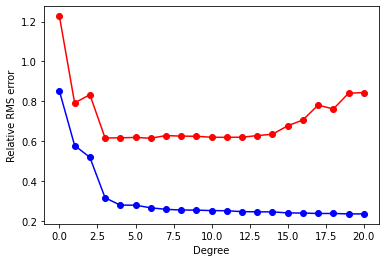

In [26]:
#13.2 Validation
#1) polynomial approximation
m = 100
# generate the test set
t = -1 + 2*np.random.random(m)
y = np.power(t,3) - t + 0.4 / (1 + 25*np.power(t,2)) + 0.10*np.random.normal(size = m)
t_test = -1 + 2*np.random.random(m)
y_test = np.power(t_test,3) - t_test + 0.4/(1 + np.power(25*t_test,2)) + 0.10*np.random.normal(size = m)
error_train = np.zeros(21)
error_test = np.zeros(21)
for p in range(1,22):
    A = vandermonde(t,p)
    theta = solve_via_backsub(A,y)
    error_train[p-1] = np.linalg.norm(A @ theta - y)/np.linalg.norm(y)                        
    error_test[p-1] = np.linalg.norm(vandermonde(t_test,p) @ theta - y_test)/np.linalg.norm(y_test)
                            
import matplotlib.pyplot as plt
plt.ion()
plt.plot(np.arange(21),error_train,'b-o',label='Trian')
plt.plot(np.arange(21),error_test,'r-o',label='Test')
plt.xlabel('Degree')
plt.ylabel('Relative RMS error')
plt.show()

In [27]:
#2) house price regression model: cross validation
D = house_sales_data()
price = D['price']
area = D['area']
beds = D['beds']
N = len(price)
X = np.column_stack([np.ones(N),area,beds])
I = np.array_split(np.random.permutation(N),5) #不均等分割,形成数组；对0到N之间的数随机排序
nfold = np.floor(N/5) #向下取整
coeff = np.zeros((5,3))
rms_train = np.zeros(5)
rms_test = np.zeros(5)
for k in range(5):
    Itest = I[k] #选取test集合
    Itrain = np.concatenate((np.delete(I,k))) #对array进行拼接；将train集合的下标拼接
    Ntrain = len(Itrain)
    Ntest = len(Itest)
    theta = solve_via_backsub(X[Itrain],price[Itrain])
    coeff[k,:] = theta
    rms_train[k] = (sum((X[Itrain]@theta - price[Itrain])**2)/N)**0.5
    rms_test[k] = (sum((X[Itest]@theta - price[Itest])**2)/N)**0.5
print(coeff) #the three parameters for five folds
#RMS errors for five folds
print(np.column_stack((rms_train,rms_test)))

NameError: name 'house_sales_data' is not defined

1.0253577259862336
0.9755113632200652


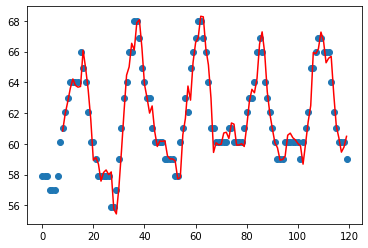

In [40]:
#3)validation time series predictions
t = temperature_data()
N = len(t)
# use first 24 days as training set
Ntrain = 24*24
t_train = t[:Ntrain]
Ntest = N - Ntrain
t_test = t[Ntrain:]
# Least squares fit of AR predictor with memory 8
M = 8
m = Ntrain - M
y = t_train[M:M+m]
A = np.column_stack([t[i:i+m] for i in range(M)])
coeff = solve_via_backsub(A,y)
rms_train = (sum((A@coeff - y)**2)/len(y))**0.5
print(rms_train)
ytest = t_test[M:]
mtest = len(ytest) 
ypred = np.column_stack([t_test[i:i+mtest] for i in range(M)])@coeff
rms_test = (sum((ypred-ytest)**2)/len(ytest))**0.5
print(rms_test)
import matplotlib.pyplot as plt
plt.ion()
Nplot = 24*5
plt.scatter(np.arange(Nplot),t_test[np.arange(Nplot)])
plt.plot(np.arange(M,Nplot),ypred[np.arange(Nplot-M)],'r')
plt.show()

In [ ]:
#13.3 feature engineering
D = house_sales_data()
price = D['price']
area = D['area']
beds = D['beds']
condo = D['condo']
location = D['location']
N = len(price)
X = np.column_stack([np.ones(N),area,np.maximum(area-1.5,0),beds,condo, location==2, location==3, location==4])
theta = solve_via_backsub(X,price)
print(theta)
#RMS prediction error
print(sum((A@theta-price)**2)/N)**0.5

import matplotlib.pyplot as plt
plt.ion()
plt.scatter(price,X@theta)
plt.plot([0,800],[0,800],'r--')
plt.ylim(0,800)
plt.xlim(0,800)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

#cross-validation
I = np.array_split(np.random.permutaion(N),5)
nfold = np.floor(N/5)
#store 8 coefficients for 5 models
models = np.zeros((5,8))
rms_train = np.zeros(5)
rms_test = np.zeros(5)
for k in range(5):
    Itest = I[k]
    Itrain = np.concatenate((np.delete(I,k)))
    Ntrain = len(Itrain)
    Ntest = len(Itest)
    theta = solve_via_backsub(X[Itrain],price[Itrain])
    models[k,:] = theta
    rms_train[k] = (sum((X[Itrain]@theta-price[Itrain])**2)/Ntrain)**0.5
    rms_test[k] = (sum((X[Itest]@theta-price[Itest])**2)/Ntest)**0.5
print(model)

[3.12559263 0.15401818]
0.20307668716659014
inf


C:\Users\15829\AppData\Local\Temp\ipykernel_9796\988974398.py:10: RuntimeWarning: overflow encountered in power
  print(np.power(10,np.array([1,2015])@theta))


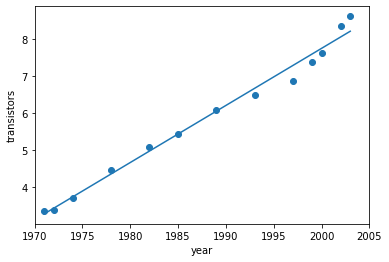

In [5]:
#exercise13
import numpy as np
t = np.array([1971,1972,1974,1978,1982,1985,1989,1993,1997,1999,2000,2002,2003])
b = np.array(np.log10([2250,2500,5000,29000,120000,275000,1180000,3100000,7500000,24000000,42000000,220000000,410000000]))
A = np.column_stack((np.ones(13),t*np.ones(13)-1970*np.ones(13)))
theta = solve_via_backsub(A,b)
print(theta)
rms_error = (sum((A@theta-b)**2)/13)**0.5
print(rms_error)
print(np.power(10,np.array([1,2015])@theta))

import matplotlib.pyplot as plt
plt.ion()
plt.scatter(t,b)
plt.plot(t,A @ theta)
#plt.yticks(np.arange(100,1e+9,9))
plt.xlim(1970,2005)
plt.xlabel("year")
plt.ylabel("transistors")
plt.show()

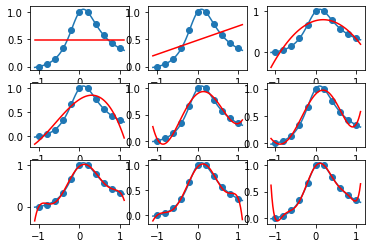

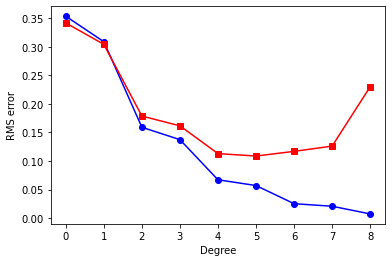

In [13]:
#excercise 13.17
import numpy as np

# vandermonde matrix
def vandermonde(t,n):
    m = len(t)
    V = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            V[i,j] = t[i]**(j)
    return V

x=np.arange(-1,1.1,0.2)
x_hat = np.linspace(-1.1,1.1,num = 100)
theta=[[] for i in range(9)]
y=np.array((1+x)/(1+5*x**2))
#A=np.column_stack((np.ones(11),x,x**2,x**3,x**4,x**5,x**6,x**7,x**8))
#A_hat=np.column_stack((np.ones(110),x_hat,x_hat**2,x_hat**3,x_hat**4,x_hat**5,x_hat**6,x_hat**7,x_hat**8))
#theta=solve_via_backsub(A,y)
#以上标注代码太复杂啦！！

polyfit = lambda t,y,p: solve_via_backsub(vandermonde(t,p),y)
for i in range(1,10):
    theta[i-1]=polyfit(x,y,i)

import matplotlib.pyplot as plt
polyeval = lambda theta,x:vandermonde(x,len(theta)) @ theta #此处x的维数不同
fig = plt.figure()
plt.ylim(-0.2,1.2)

for i in range(1,10):
    plt.subplot(3,3,i)  #生成两行两列的图表，这是第一个
    plt.scatter(x,y)
    plt.plot(x_hat,np.array((1+x_hat)/(1+5*x_hat**2))) #the true function
    plt.plot(x_hat, polyeval(theta[i-1], x_hat),'r') # the fitting polynomials
plt.show()

u=np.linspace(-1.1,1.1,num=10)
v=(1+u)/(1+5*u**2)
error_train=np.zeros(9)
error_test=np.zeros(9)
for p in range(1,10):
    A = vandermonde(x,p)
    error_train[p-1] = np.linalg.norm(A @ theta[p-1] - y)/n**0.5                      
    error_test[p-1] = np.linalg.norm(vandermonde(u,p) @ theta[p-1] - v)/n**0.5

plt.ion()
plt.plot(np.arange(9),error_train,'b-o')
plt.plot(np.arange(9),error_test,'r-s')
plt.xlabel('Degree')
plt.ylabel('RMS error')
plt.show()

In [14]:
#14 least square classification
#14.1 classification

#1)confusion matrix
## Count errors and correct predictions
import numpy as np
Ntp = lambda y,yhat: sum((y == True)&(yhat == True))
Nfn = lambda y,yhat: sum((y == True)&(yhat == False))
Nfp = lambda y,yhat: sum((y == False)&(yhat == True))
Ntn = lambda y,yhat: sum((y == False)&(yhat == False))
error_rate = lambda y,yhat:(Nfn(y,yhat)+Nfp(y,yhat))/len(y)
confusion_matrix = lambda y,yhat:np.block([[Ntp(y,yhat),Nfp(y,yhat)],
                                           [Nfn(y,yhat),Ntn(y,yhat)]])
y = np.random.randint(2,size = 100)
yhat = np.random.randint(2,size = 100)
print(confusion_matrix(y,yhat))
print(error_rate(y,yhat))

# use the function (it is reversed relative)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,yhat))

[[16 30]
 [33 21]]
0.63
[[21 30]
 [33 16]]


In [15]:
#14.2 least square classifier
# regression model
ftilde = lambda x:x @ beta + v
#regression classifier
fhat = lambda x:ftilde(x)>0  #(if true then x=1;else x=-1)

#1)Iris flower classification (distinguish virginica from two other classes)
D = iris_data()
# Create 150 by 4 data matrix
iris = np.vstack([D['setosa'], D['versicolor'], D['virginica']])
# y[k] is true (1) if virginica, false (-1) otherwise
y = np.concatenate([np.zeros(100),np.ones(50)])
A = np.column_stack([np.ones(150),iris])
theta = solve_via_backsub(A,2*y-1)
print(theta)
yhat = A @ theta >0  #(if true then entry=1;else entry=-1)
C = confusion_matrix(y,yhat)
print(C)
print(error_rate(y,yhat))
print(np.average(y!=yhat)) #that is error_rate

NameError: name 'solve_via_bscksub' is not defined

In [3]:
#14.3 multi-class classifiers
#1) Multi-class error rate and confusion matrix
error_rate = lambda y,yhat:np.average(y!=yhat)
def confusion_matrix(y,yhat,K):
    C = np.zeros((K,K))
    for i in range(K):
        for j in range(K):
            C[i,j] = sum((y == i+1) & (yhat == j+1))
    return C
#test for K = 4 on random vectors of length 100
K = 4
y = np.random.randint(1,K+1,size=100)
yhat = np.random.randint(1,K+1,size=100)
C = confusion_matrix(y,yhat,K)
print(C)
print(error_rate(y,yhat),1-sum(np.diag(C))/np.sum(C))

#2) Least squares multi-class classifier
row_argmax = lambda u:[np.argmax(u[i,:]) for i in range(len(u))] #function np.argmax(u) finds the index of the largest entry in the row or column vector u.
A = np.random.normal(size = (4,5))
print(row_argmax(A))
fhat = lambda x,theta:row_argmax(x @ theta)

#3) matrix least squares
def one_hot(ycl,K):
    N = len(ycl)
    Y = np.zeros((N,K))
    for j in range(K):
        Y[np.where(ycl == j),j] = 1
    return Y
K = 4
ycl = np.random.randint(K,size = 6)
Y = one_hot(ycl,K)
print(Y)
print(2*Y - 1)

#using the function we have defined, the matrix least sqaures multi-class classifier can be computed in a few lines.
def ls_multiclass(x,ycl,K):
    #n,N = x.shape #n is the number of examples, N is the number of features
    #theta = solve_via_backsub(x, 2*one_hot(ycl,K) -1)
    theta = np.linalg.pinv(x) @ (2*one_hot(ycl,K) -1) 
    yhat = 1 + np.array(row_argmax(x @ theta))
    return theta,yhat

[[10.  4.  5. 11.]
 [ 4.  9.  5.  7.]
 [ 4.  6.  5.  4.]
 [ 9.  6.  5.  6.]]
0.7 0.7
[2, 0, 0, 4]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[-1. -1.  1. -1.]
 [-1. -1.  1. -1.]
 [ 1. -1. -1. -1.]
 [-1.  1. -1. -1.]
 [ 1. -1. -1. -1.]
 [ 1. -1. -1. -1.]]


In [4]:
def iris_data():
    """
    iris_data()
    Returns a dictionary `D` with the Iris flower data set, discussed in
    sections 14.2.1 and 14.3.2.  The items in the dictionary are:
    * `D["setosa"]`:  a 50 x 4 matrix with 50 examples of Iris Setosa
    * `D["versicolor"]`: a 50 x 4 matrix with 50 examples of Iris Versicolor
    * `D["virginica"]`: a 50 x 4 matrix with 50 examples of Iris Virginica.
    The columns give values for four features:
    1. sepal length in cm
    2. sepal width in cm
    3. petal length in cm
    4. petal width in cm.
    """
    # 50 examples of Iris Setosa
    setosa = [ 
    [5.1, 3.5, 1.4, 0.2], 
    [4.9, 3.0, 1.4, 0.2],
    [4.7, 3.2, 1.3, 0.2], 
    [4.6, 3.1, 1.5, 0.2], 
    [5.0, 3.6, 1.4, 0.2], 
    [5.4, 3.9, 1.7, 0.4], 
    [4.6, 3.4, 1.4, 0.3], 
    [5.0, 3.4, 1.5, 0.2],
    [4.4, 2.9, 1.4, 0.2], 
    [4.9, 3.1, 1.5, 0.1], 
    [5.4, 3.7, 1.5, 0.2], 
    [4.8, 3.4, 1.6, 0.2], 
    [4.8, 3.0, 1.4, 0.1], 
    [4.3, 3.0, 1.1, 0.1], 
    [5.8, 4.0, 1.2, 0.2], 
    [5.7, 4.4, 1.5, 0.4], 
    [5.4, 3.9, 1.3, 0.4], 
    [5.1, 3.5, 1.4, 0.3],
    [5.7, 3.8, 1.7, 0.3], 
    [5.1, 3.8, 1.5, 0.3],
    [5.4, 3.4, 1.7, 0.2], 
    [5.1, 3.7, 1.5, 0.4], 
    [4.6, 3.6, 1.0, 0.2], 
    [5.1, 3.3, 1.7, 0.5], 
    [4.8, 3.4, 1.9, 0.2], 
    [5.0, 3.0, 1.6, 0.2], 
    [5.0, 3.4, 1.6, 0.4], 
    [5.2, 3.5, 1.5, 0.2], 
    [5.2, 3.4, 1.4, 0.2], 
    [4.7, 3.2, 1.6, 0.2], 
    [4.8, 3.1, 1.6, 0.2], 
    [5.4, 3.4, 1.5, 0.4], 
    [5.2, 4.1, 1.5, 0.1], 
    [5.5, 4.2, 1.4, 0.2], 
    [4.9, 3.1, 1.5, 0.2],  
    [5.0, 3.2, 1.2, 0.2], 
    [5.5, 3.5, 1.3, 0.2], 
    [4.9, 3.6, 1.4, 0.1], 
    [4.4, 3.0, 1.3, 0.2], 
    [5.1, 3.4, 1.5, 0.2], 
    [5.0, 3.5, 1.3, 0.3], 
    [4.5, 2.3, 1.3, 0.3], 
    [4.4, 3.2, 1.3, 0.2], 
    [5.0, 3.5, 1.6, 0.6], 
    [5.1, 3.8, 1.9, 0.4], 
    [4.8, 3.0, 1.4, 0.3], 
    [5.1, 3.8, 1.6, 0.2], 
    [4.6, 3.2, 1.4, 0.2], 
    [5.3, 3.7, 1.5, 0.2], 
    [5.0, 3.3, 1.4, 0.2]]
    # 50 examples of Iris Versicolor
    versicolor = [ 
    [7.0, 3.2, 4.7, 1.4], 
    [6.4, 3.2, 4.5, 1.5], 
    [6.9, 3.1, 4.9, 1.5], 
    [5.5, 2.3, 4.0, 1.3], 
    [6.5, 2.8, 4.6, 1.5], 
    [5.7, 2.8, 4.5, 1.3], 
    [6.3, 3.3, 4.7, 1.6], 
    [4.9, 2.4, 3.3, 1.0], 
    [6.6, 2.9, 4.6, 1.3], 
    [5.2, 2.7, 3.9, 1.4], 
    [5.0, 2.0, 3.5, 1.0], 
    [5.9, 3.0, 4.2, 1.5], 
    [6.0, 2.2, 4.0, 1.0], 
    [6.1, 2.9, 4.7, 1.4], 
    [5.6, 2.9, 3.6, 1.3], 
    [6.7, 3.1, 4.4, 1.4], 
    [5.6, 3.0, 4.5, 1.5], 
    [5.8, 2.7, 4.1, 1.0], 
    [6.2, 2.2, 4.5, 1.5], 
    [5.6, 2.5, 3.9, 1.1], 
    [5.9, 3.2, 4.8, 1.8], 
    [6.1, 2.8, 4.0, 1.3], 
    [6.3, 2.5, 4.9, 1.5], 
    [6.1, 2.8, 4.7, 1.2], 
    [6.4, 2.9, 4.3, 1.3], 
    [6.6, 3.0, 4.4, 1.4], 
    [6.8, 2.8, 4.8, 1.4], 
    [6.7, 3.0, 5.0, 1.7], 
    [6.0, 2.9, 4.5, 1.5], 
    [5.7, 2.6, 3.5, 1.0], 
    [5.5, 2.4, 3.8, 1.1], 
    [5.5, 2.4, 3.7, 1.0], 
    [5.8, 2.7, 3.9, 1.2], 
    [6.0, 2.7, 5.1, 1.6], 
    [5.4, 3.0, 4.5, 1.5], 
    [6.0, 3.4, 4.5, 1.6], 
    [6.7, 3.1, 4.7, 1.5], 
    [6.3, 2.3, 4.4, 1.3], 
    [5.6, 3.0, 4.1, 1.3], 
    [5.5, 2.5, 4.0, 1.3], 
    [5.5, 2.6, 4.4, 1.2], 
    [6.1, 3.0, 4.6, 1.4], 
    [5.8, 2.6, 4.0, 1.2], 
    [5.0, 2.3, 3.3, 1.0], 
    [5.6, 2.7, 4.2, 1.3], 
    [5.7, 3.0, 4.2, 1.2], 
    [5.7, 2.9, 4.2, 1.3], 
    [6.2, 2.9, 4.3, 1.3], 
    [5.1, 2.5, 3.0, 1.1], 
    [5.7, 2.8, 4.1, 1.3]]
    # 50 examples of Iris Virginica
    virginica = [ 
    [6.3, 3.3, 6.0, 2.5], 
    [5.8, 2.7, 5.1, 1.9], 
    [7.1, 3.0, 5.9, 2.1], 
    [6.3, 2.9, 5.6, 1.8], 
    [6.5, 3.0, 5.8, 2.2], 
    [7.6, 3.0, 6.6, 2.1], 
    [4.9, 2.5, 4.5, 1.7], 
    [7.3, 2.9, 6.3, 1.8], 
    [6.7, 2.5, 5.8, 1.8], 
    [7.2, 3.6, 6.1, 2.5], 
    [6.5, 3.2, 5.1, 2.0], 
    [6.4, 2.7, 5.3, 1.9], 
    [6.8, 3.0, 5.5, 2.1], 
    [5.7, 2.5, 5.0, 2.0], 
    [5.8, 2.8, 5.1, 2.4], 
    [6.4, 3.2, 5.3, 2.3], 
    [6.5, 3.0, 5.5, 1.8], 
    [7.7, 3.8, 6.7, 2.2], 
    [7.7, 2.6, 6.9, 2.3], 
    [6.0, 2.2, 5.0, 1.5], 
    [6.9, 3.2, 5.7, 2.3], 
    [5.6, 2.8, 4.9, 2.0], 
    [7.7, 2.8, 6.7, 2.0], 
    [6.3, 2.7, 4.9, 1.8], 
    [6.7, 3.3, 5.7, 2.1], 
    [7.2, 3.2, 6.0, 1.8], 
    [6.2, 2.8, 4.8, 1.8], 
    [6.1, 3.0, 4.9, 1.8], 
    [6.4, 2.8, 5.6, 2.1], 
    [7.2, 3.0, 5.8, 1.6], 
    [7.4, 2.8, 6.1, 1.9], 
    [7.9, 3.8, 6.4, 2.0], 
    [6.4, 2.8, 5.6, 2.2], 
    [6.3, 2.8, 5.1, 1.5], 
    [6.1, 2.6, 5.6, 1.4], 
    [7.7, 3.0, 6.1, 2.3], 
    [6.3, 3.4, 5.6, 2.4], 
    [6.4, 3.1, 5.5, 1.8], 
    [6.0, 3.0, 4.8, 1.8], 
    [6.9, 3.1, 5.4, 2.1], 
    [6.7, 3.1, 5.6, 2.4], 
    [6.9, 3.1, 5.1, 2.3], 
    [5.8, 2.7, 5.1, 1.9], 
    [6.8, 3.2, 5.9, 2.3], 
    [6.7, 3.3, 5.7, 2.5], 
    [6.7, 3.0, 5.2, 2.3], 
    [6.3, 2.5, 5.0, 1.9], 
    [6.5, 3.0, 5.2, 2.0], 
    [6.2, 3.4, 5.4, 2.3], 
    [5.9, 3.0, 5.1, 1.8]]
    return {"setosa": setosa, "versicolor": versicolor,"virginica": virginica}

#4) Iris flower classification
D = iris_data()
setosa = np.array(D['setosa'])
versicolor = np.array(D['versicolor'])
virginica = np.array(D['virginica'])
#pick three random permutations of 1,...,50
I1 = np.random.permutation(50) #打乱
I2 = np.random.permutation(50)
I3 = np.random.permutation(50)
# training set is 40 randomly picked examples per class
xtrain = np.vstack([setosa[I1[:40],:],versicolor[I2[:40],:],virginica[I3[:40],:]])
#add contant feature one
xtrain = np.column_stack([np.ones(120),xtrain])
# the true labels for train set are a sequence of 1s, 2s and 3s
# since the examples in Xtrain are stacked in order
ytrain = np.hstack([np.ones(40),2*np.ones(40),3*np.ones(40)])-1  #必须要-1，否则在ls_multiclass中对应位置偏移
# test set is remaining 10 examples for each class
xtest = np.vstack([setosa[I1[40:],:], versicolor[I2[40:],:],virginica[I3[40:],:]])
xtest = np.column_stack([np.ones(30), xtest])
ytest = np.hstack([np.ones(10), 2*np.ones(10), 3*np.ones(10)])
theta,yhat = ls_multiclass(xtrain,ytrain,3)
ctrain = confusion_matrix(ytrain+1,yhat,3)  #ytrain+1使ytrain处于1-3之间
print(ctrain)

error_train = error_rate(ytrain+1,yhat)  #ytrain+1使ytrain处于1-3之间
print(error_train)

yhat = np.array(row_argmax(xtest @ theta)) + 1
ctest = confusion_matrix(ytest,yhat,3)
print(ctest)

error_test = error_rate(ytest,yhat)
print(error_test)

#本题的代码有误，矩阵的最小二乘解不适用函数solve_via_backsub，在矩阵规格上出现问题。但是现在有点累，过一会儿再写
#yes!搞出来啦！我真棒！！！

[[40.  0.  0.]
 [ 0. 27. 13.]
 [ 0.  4. 36.]]
0.14166666666666666
[[10.  0.  0.]
 [ 0.  9.  1.]
 [ 0.  1.  9.]]
0.06666666666666667


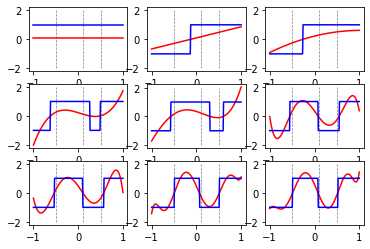

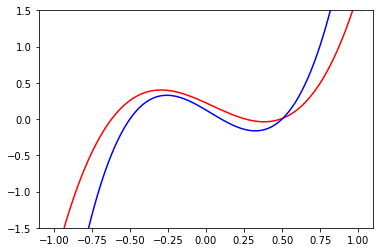

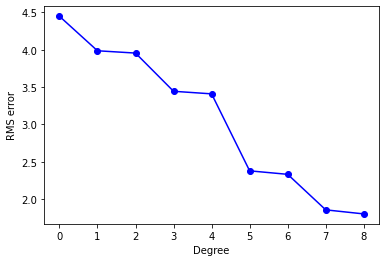

In [36]:
#exercise 14.6 
import numpy as np
import random

# vandermonde matrix
def vandermonde(t,n):
    m = len(t)
    V = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            V[i,j] = t[i]**(j)
    return V

x = np.linspace(-1,1,num=200)
y = np.array([1 if -0.5<x[i]<0.1 or 0.5<x[i] else -1 for i in range(200)])
theta=[[] for i in range(9)]

polyfit = lambda t,y,p: solve_via_backsub(vandermonde(t,p),y)
for i in range(1,10):
    theta[i-1]=polyfit(x,y,i)

import matplotlib.pyplot as plt
polyeval = lambda theta,x:vandermonde(x,len(theta)) @ theta #此处x的维数不同
fig = plt.figure()
plt.ylim(-2,2)

c=random.random()
for i in range(1,10):
    plt.subplot(3,3,i)  
    plt.vlines(-0.5,-2,2,linestyle = '--',colors='gray',linewidth=0.7)
    plt.vlines(0.1,-2,2,linestyle = '--',colors='gray',linewidth=0.7)
    plt.vlines(0.5,-2,2,linestyle = '--',colors='gray',linewidth=0.7)
    plt.plot(x, polyeval(theta[i-1],x),'r') # the fitting polynomials
    plt.plot(x,[1 if polyeval(theta[i-1],x)[j]>0 else -1 for j in range(200)],'b')
plt.show()

plt.plot(x,polyeval(theta[3],x),'r')
plt.plot(x,5*(x+0.5)*(x-0.1)*(x-0.5),'b')
plt.ylim(-1.5,1.5)
#plt.plot(x,[1 if 5*(polyeval(theta[2],x)[j]+0.5)*(polyeval(theta[2],x)[j]-0.1)*(polyeval(theta[2],x)[j]-0.5)>0 else -1 for j in range(200)],'b')
plt.show()

error_train=np.zeros(9)
for p in range(1,10):
    A = vandermonde(x,p)
    error_train[p-1] = np.linalg.norm(A @ theta[p-1] - y)/n**0.5                      

plt.ion()
plt.plot(np.arange(9),error_train,'b-o')
plt.xlabel('Degree')
plt.ylabel('RMS error')
plt.show()

C:\Users\15829\AppData\Local\Temp\ipykernel_14900\2518564991.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_hat = np.array([[np.ones(1),x[i][0],x[i][1],x[i][0]**2,x[i][0]*x[i][1],x[i][1]**2] for i in range(200)])


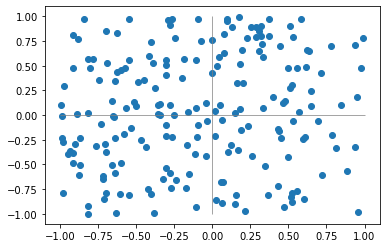

In [74]:
#exercise 14.7
import random
import numpy as np
import matplotlib.pyplot as plt

x = 2*np.random.random((200,2))-1
x_hat = np.array([[np.ones(1),x[i][0],x[i][1],x[i][0]**2,x[i][0]*x[i][1],x[i][1]**2] for i in range(200)])
y = np.array([1 if x[i][0]*x[i][1]>0 else -1 for i in range(200)])
theta = solve_via_backsub(x_hat,y)

plt.ion()
plt.vlines(0,-1,1,linestyle = '-',colors='gray',linewidth=0.7)
plt.hlines(0,-1,1,linestyle = '-',colors='gray',linewidth=0.7)
x_x = np.array([x[i][0] for i in range(200)])
x_y = np.array([x[i][1] for i in range(200)])
plt.scatter(x_x,x_y)